# **Descriptive Statistics**

Descriptive statistics is the branch of statistics that involves summarising and describing the main features of a dataset. Instead of trying to draw conclusions about a larger population (which is the domain of inferential statistics), descriptive statistics focuses solely on the data at hand. It uses numerical and graphical tools to present the data in a clear and concise manner, highlighting key patterns, trends, and characteristics. This allows for a better understanding of the data's distribution, central tendency, and variability. Think of it as creating a snapshot or summary of your data, rather than making predictions or inferences about a larger group.

In [76]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns

from src.config import CREDIT_RISK_DATA_DIR

In [2]:
os.chdir(CREDIT_RISK_DATA_DIR)

df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## **Data Types**

Before we even begin crunching numbers, we need to understand what kind of data we're dealing with. We'll differentiate between categorical (nominal and ordinal) and numerical (interval and ratio) data.

### **Numerical Variables**

Variables that are measured are **numerical variables**. There are two ways to get a number: by counting and measuring. 


#### **Discrete Variables**

Discrete variables come from counting. For a variable to be discrete, there must be gaps between the smallest possible units. People, cars, and dogs are all good examples of discrete variables.

In [4]:
print(df.person_age.unique())

[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]


#### **Continuous Variables**

Continuous variables come from measurements. For a variable to be continuous, there must be infinitely smaller units of measurement between one unit and the next unit. Continuous variables can be represented by decimal places (but because of rounding, sometimes they are whole numbers). Length, time, and temperature are all good examples of continuous variables because they all increase continuously.

In [6]:
print(df.loan_int_rate.unique())

[16.02 11.14 12.87 15.23 14.27  7.14 12.42 11.11  8.9  14.74 10.37  8.63
  7.9  18.39 10.65 20.25 18.25 10.99  7.49 16.77 17.58  7.29 14.54 12.68
 17.74  9.32  9.99 12.84 11.12  6.62 14.17 13.85 13.49  7.51 16.89   nan
 17.99 12.69  7.88 19.41 10.38 15.33 16.45 18.62 15.96 11.48  5.99 11.58
 15.7  15.99 14.84 14.42  6.99 13.61  9.91 13.48 12.98 13.57 15.68 13.06
 15.62 11.71  8.88 12.18 13.99  5.42 12.73 11.49 19.91 11.83 14.59  9.64
 16.35 18.67 10.08 10.36 12.23 16.07 14.22 14.79 13.22 11.86 13.43 15.28
 17.93  9.25 10.62 18.43 11.36 15.65 13.04 17.04 14.83 14.65 16.82 10.25
 14.96 11.99  8.49  6.17 16.32 14.35 15.21 14.09 17.49 13.92 16.49  5.79
 13.11  6.54 12.53 15.95 10.74 15.27 14.72 13.35  7.68 14.46 13.47  6.03
 12.92 18.64 16.7  18.3   9.63 14.7  15.37 14.26  8.   11.26 19.04 13.98
 15.58 15.31  9.33 11.91  8.38 10.59 16.   11.54 12.61 17.27 15.05 10.75
  6.39 18.09 19.74  6.91 14.93 17.14 11.03  8.94 11.46  7.66 17.56 10.39
 16.29 17.8  19.69 15.83 20.03 20.16 13.79 11.89 14

### **Categorical Variables**

Variables that are categorized are **categorical variables**. Categorical variables come in 3 types:


#### **Binary Variables**

Which have only two possible variations. Binary variables are things like on/off, yes/no, and TRUE/FALSE. If there is any possibility of a third option, it is not a binary variable.

In [8]:
print(df.loan_status.unique())

[1 0]


#### **Ordinal Variables**

Which have an inherent ranking.  Ordinal variables are usually described by numbers like 1st, 2nd, 3rd. Places in a race, grades in school, and the scales in survey responses (Likert Scales) are ordinal variables. Ordinal variables can be a little tricky because even though they are numbers, it doesn’t make sense to do math on them.

In [9]:
print(df.loan_grade.unique())

['D' 'B' 'C' 'A' 'E' 'F' 'G']


#### **Nominal Variables**

Which describe something. Often, nominal variables describe something with a lot of variation. It can be hard to capture all of that variation, so an ‘Other’ category is often necessary.

In [10]:
print(df.loan_intent.unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


### **Date & Time Variables**

Date variables are a special type of variable that don’t fit neatly into either numerical or categorical categories. However, they can be treated differently depending on how they are used in modeling. Date variables (e.g., `2024-03-29`) are not inherently numerical because arithmetic operations (like addition) don’t always make sense. They are not categorical because they have an intrinsic order.

## **Univariate Statistics**



### **Measures of Central Tendency**

When summarizing numeric variables, we often want to describe central location and spread. The central location (also called central tendency) is often used to communicate the “typical” value of a variable. Recall that there are a few different ways of calculating the central location:

- Mean: Also called the “average”; calculated as the sum of all values divided by the number of values.
- Median: The middle value of the variable when sorted.
- Mode: The most frequent value in the variable.
- Trimmed Mean: The mean excluding x percent of the lowest and highest data points.

Choosing an appropriate summary statistic for central tendency sometimes requires data visualization techniques along with domain knowledge.


In [15]:
print("Mean: ", df.person_age.mean())
print("Median: ", df.person_age.median())
print("Mode: ", df.person_age.mode())

Mean:  27.73459992019889
Median:  26.0
Mode:  0    23
Name: person_age, dtype: int64



### **Measures of Dispersion (Variability)**

Spread, or dispersion, describes the variability within a feature. This is important because it provides context for measures of central location. 

Like the central location measures, there are a few values that can describe the spread:

- Range: The difference between the maximum and minimum values in a variable.
- Inter-Quartile Range (IQR): The difference between the 75th and 25th percentile values.
- Variance: The average of the squared distance from each data point to the mean.
- Standard Deviation (SD): The square root of the variance.
- Mean Absolute Deviation (MAD): The mean absolute value of the distance between each data point and the mean.

Choosing the most appropriate measure of spread is much like choosing a measure of central tendency, in that we need to consider the data holistically.

In [ ]:
print("Range: ", df.person_age.max() - df.person_age.min())
print("IQR: ", np.percentile(df.person_age, 75) - np.percentile(df.person_age, 25))
print("Variance: ", df.person_age.var())
print("Variance: ", df.person_age.std())

Range:  124
IQR:  7.0
Variance:  40.298099616634744
Variance:  6.34807841922536


In [30]:
df.describe(include=[np.number], percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
10%,22.000000,2.859000e+04,0.000000,3000.000000,6.910000,0.000000,0.050000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
90%,36.000000,1.100040e+05,10.000000,19000.000000,15.298000,1.000000,0.320000,11.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Categorical variables can be either ordinal (ordered) or nominal (unordered). For ordinal categorical variables, we may still want to summarize central location and spread. However, because ordinal categories are not necessarily evenly spaced (like numbers), we should NOT calculate the mean of an ordinal categorical variable (or anything that relies on the mean, like variance, standard deviation, and MAD).



#### **Frequency Distributions**

For nominal categorical variables (and ordinal categorical variables), another common numerical summary statistic is the frequency or proportion of observations in each category. This is often reported using a frequency table and can be visualized using a bar plot.

In [24]:
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

Alternatively, we could also obtain the proportions by specifying normalize=True to the .value_counts() method:

In [25]:
df.loan_status.value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [29]:
# Binary and OHE variables
df.describe(include=[np.bool, object, "string"])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


### **Data Visualization**

Data visualization is an important component of Exploratory Data Analysis (EDA) because it allows a data analyst to “look at” their data and get to know the variables and relationships between them. In order to choose and design a data visualization, it is important to consider two things:

- The question you want to answer (and how many variables that question involves).
- The data that is available. (is it quantitative or categorical?)

While numerical summaries are useful for condensing information, visual summaries can provide even more context and detail in a small amount of space. 

There are two main plotting libraries that most Python users use: Matplotlib and seaborn. Both libraries can create beautiful visuals–Matplotlib is versatile and customizable, whereas seaborn is built on top of Matplotlib and its features are a little more user friendly. 

#### **Histograms & KDE Plots**

For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

Python’s `seaborn` library, built on top of `matplotlib`, offers the `boxplot()` and `histplot()` to easily plot data from a pandas DataFrame:

<Axes: xlabel='person_age', ylabel='Count'>

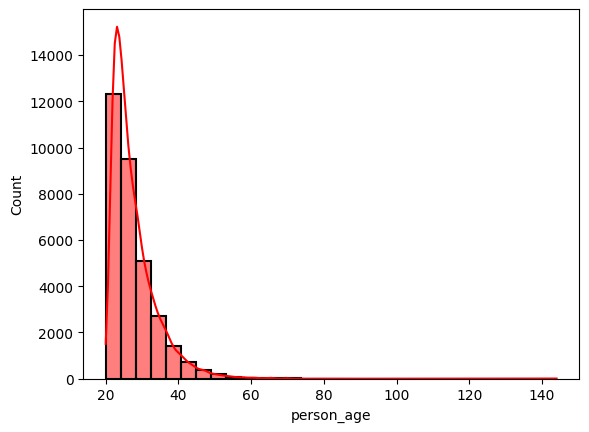

In [33]:
sns.histplot(df.person_age, bins=30, kde=True, color="red", linewidth=1.5, edgecolor="black")

<Axes: xlabel='loan_amnt', ylabel='Density'>

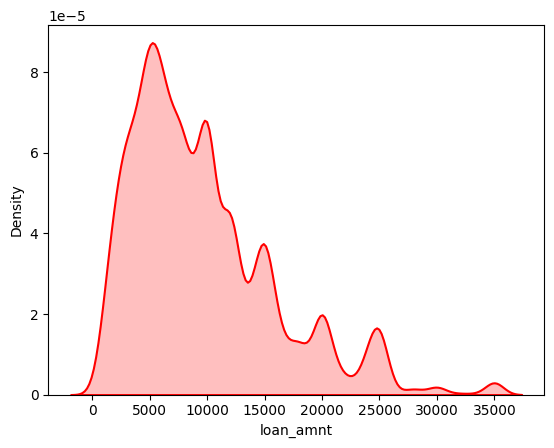

In [35]:
sns.kdeplot(
    df.loan_amnt,
    color="red",
    linewidth=1.5,
    fill=True,
)

#### **Boxplots**

<Axes: xlabel='person_age'>

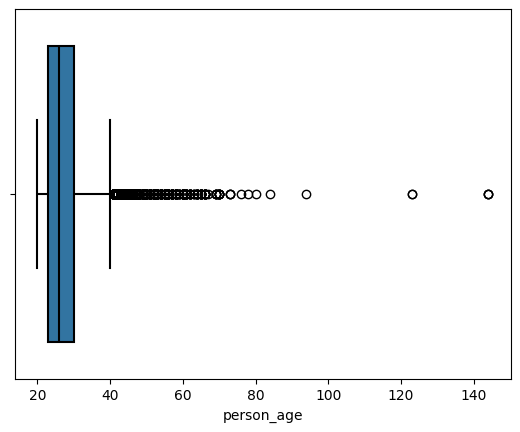

In [36]:
sns.boxplot(x="person_age", data=df, linewidth=1.5, linecolor="black")

#### **Pie Charts**

For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.


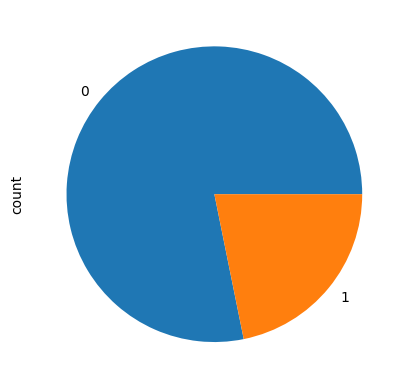

In [38]:
df.loan_status.value_counts().plot.pie()
plt.show()
plt.close()


#### **Bar Charts**

Python’s seaborn library offers several functions that can create bar charts. The simplest for plotting the counts is `countplot()`

<Axes: xlabel='loan_status', ylabel='count'>

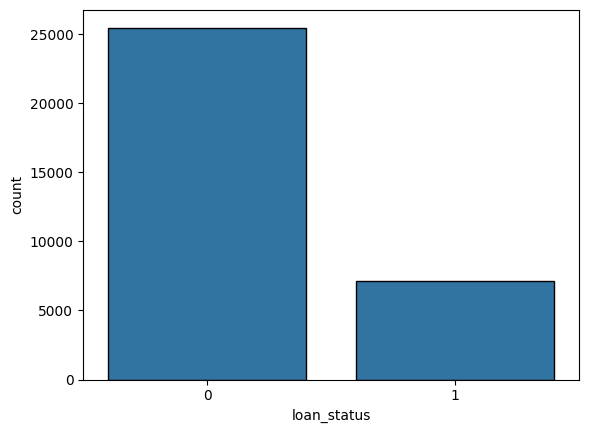

In [40]:
sns.countplot(x="loan_status", data=df, edgecolor="black")

#### **Dog Charts**

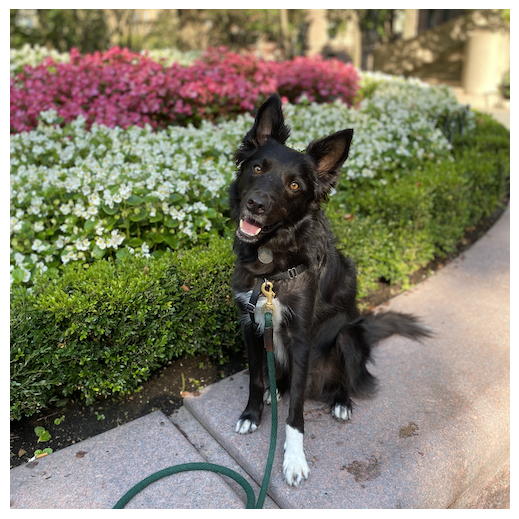

In [41]:
sns.dogplot(df["person_age"], bins=5, kde=True, color="green", linewidth=1.5, edgecolor="white")

## **Bivariate Statistics**

In contrast to univariate statistics, bivariate statistics are used to summarize the relationship between two variables.

### **Numerical Variable to Categorical Variable**

One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

##### **Side-by-side Box Plots**

<Axes: xlabel='loan_status', ylabel='person_age'>

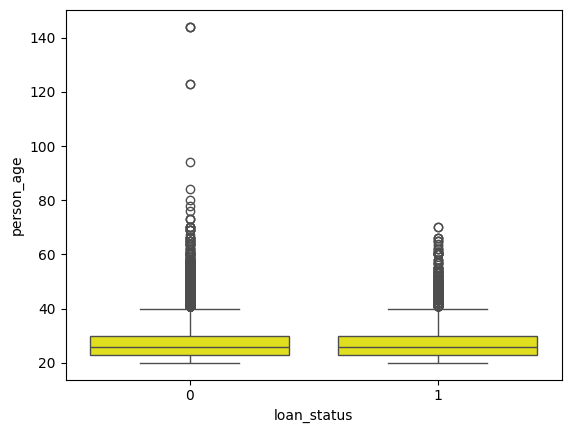

In [ ]:
sns.boxplot(x="loan_status", y="person_age", data=df, color="yellow")

<Axes: xlabel='loan_status', ylabel='person_age'>

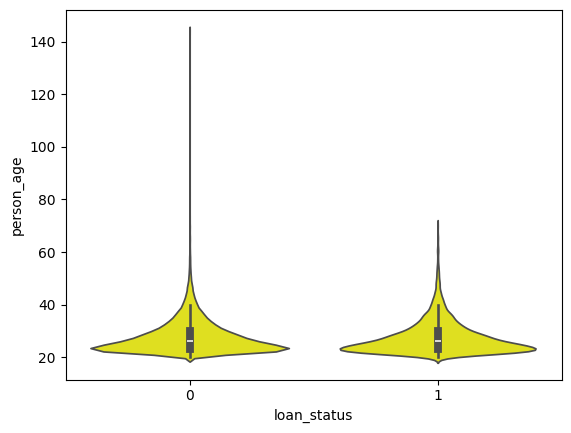

In [ ]:
sns.violinplot(x="loan_status", y="person_age", data=df, color="yellow")

#### **Overlapping Histograms**

Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. While overlapping histograms and side by side boxplots can convey similar information, histograms give us more detail and can be useful in spotting patterns that were not visible in a box plot (eg., a bimodal distribution).

In the code below, setting `alpha = 0.5` ensures that the histograms are see-through enough that we can see both of them at once. 

<Axes: xlabel='person_age', ylabel='Count'>

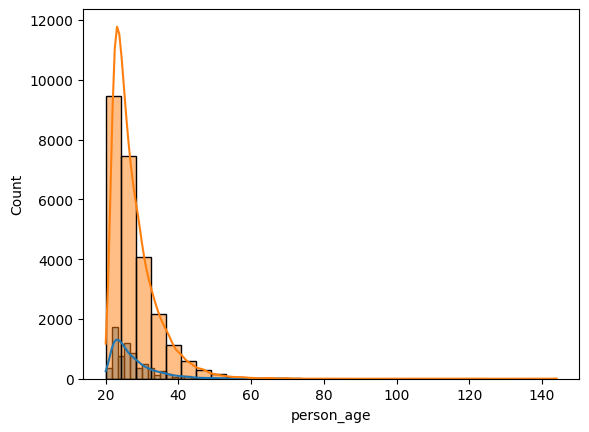

In [44]:
sns.histplot(df[df["loan_status"] == 1]["person_age"], bins=30, alpha=0.5, kde=True)
sns.histplot(df[df["loan_status"] == 0]["person_age"], bins=30, alpha=0.5, kde=True)

<Axes: xlabel='person_age', ylabel='Density'>

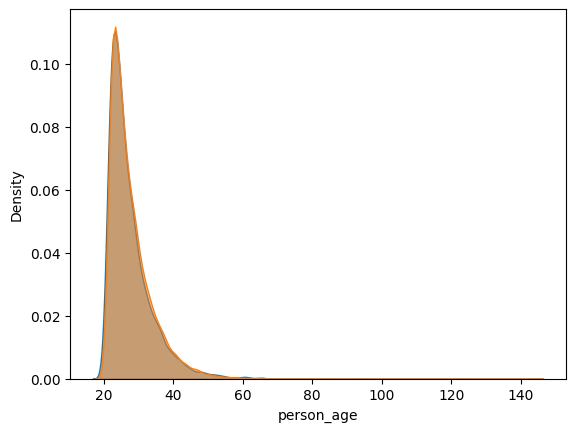

In [45]:
sns.kdeplot(df[df["loan_status"] == 1]["person_age"], alpha=0.5, fill=True)
sns.kdeplot(df[df["loan_status"] == 0]["person_age"], alpha=0.5, fill=True)

If you're plotting histograms, you can normalize them so that the total area sums to 1.

<Axes: xlabel='person_age', ylabel='Density'>

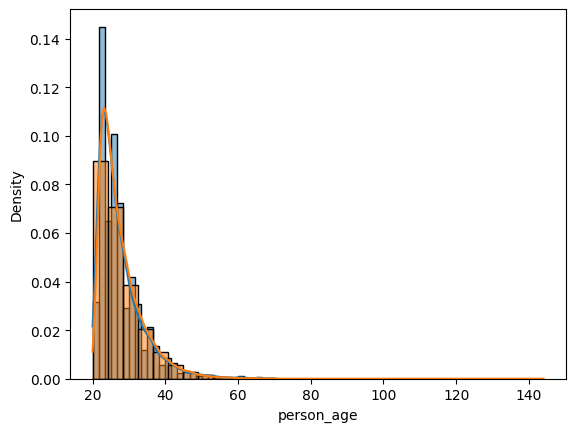

In [46]:
sns.histplot(
    df[df["loan_status"] == 1]["person_age"],
    bins=30,
    alpha=0.5,
    kde=True,
    stat="density",
)
sns.histplot(
    df[df["loan_status"] == 0]["person_age"],
    bins=30,
    alpha=0.5,
    kde=True,
    stat="density",
)

### **Two Numerical Variables**

#### **Scatter Plot**

One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data. Let’s start by plotting the area of a rental against its monthly price to see if we can spot any patterns.

In [49]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

C:\Users\mervedosa\AppData\Local\Temp\ipykernel_5524\2303646555.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="person_age", y="person_income", data=df, palette="coolwarm")


<Axes: xlabel='person_age', ylabel='person_income'>

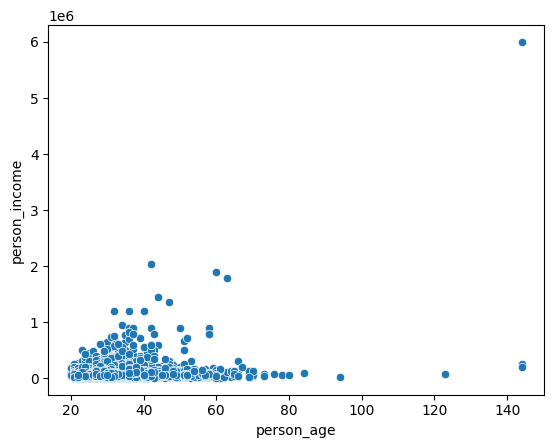

In [52]:
sns.scatterplot(x="person_age", y="person_income", data=df, palette="coolwarm")

#### **Pearson Correlation**

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

The `pearsonr()` function from `scipy.stats` can be used to calculate correlation as follows:

In [54]:
corr, p = pearsonr(df.person_income, df.person_age)
print(corr)

0.17320249281739794


Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

### **Two Categorical Variables**

#### **Contingency Tables**

Contingency tables, also known as two-way tables or cross-tabulations, are useful for summarizing two variables at the same time. For example, suppose we are interested in understanding whether there is an association between influence (whether a person thinks they have a talent for influencing people) and leader (whether they see themself as a leader). We can use the `crosstab` function from pandas to create a contingency table:

In [58]:
owner_default_freq = pd.crosstab(df.person_home_ownership, df.loan_status)
owner_default_freq

loan_status,0,1
person_home_ownership,,
MORTGAGE,11754,1690
OTHER,74,33
OWN,2391,193
RENT,11254,5192


However, sometimes it’s helpful to convert those frequencies to proportions. We can accomplish this simply by dividing the all the frequencies in a contingency table by the total number of observations (the sum of the frequencies):

In [59]:
owner_default_prop = pd.crosstab(df.person_home_ownership, df.loan_status) / len(df)
owner_default_prop

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.360762,0.051871
OTHER,0.002271,0.001013
OWN,0.073386,0.005924
RENT,0.345416,0.159357


Now, let’s take a moment to think about what the tables would look like if there were no association between the variables. Our first instinct may be that there would be .25 (25%) of the data in each of the four cells of the table, but that is not the case. The proportion of respondents in each category of a single question is called a marginal proportion. 

In [61]:
default_marginals = owner_default_prop.sum(axis=0)
default_marginals

loan_status
0    0.781836
1    0.218164
dtype: float64

In [62]:
owner_marginals = owner_default_prop.sum(axis=1)
owner_marginals

person_home_ownership
MORTGAGE    0.412633
OTHER       0.003284
OWN         0.079310
RENT        0.504773
dtype: float64

#### **Bar Graphs with Legend**

<Axes: xlabel='person_home_ownership', ylabel='count'>

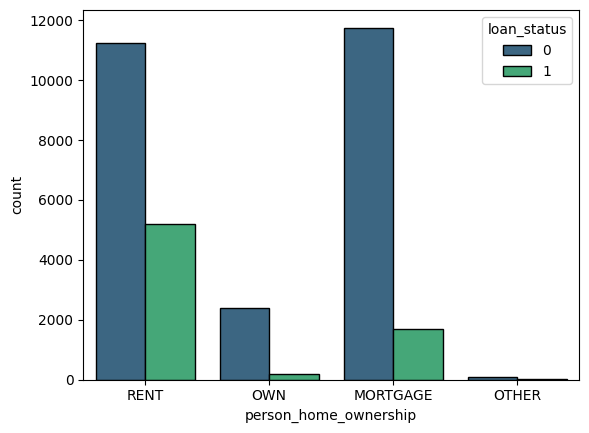

In [63]:
sns.countplot(
    x="person_home_ownership", hue="loan_status", data=df, palette="viridis", edgecolor="black"
)

#### **Chi-Square Statistic**

While we can inspect these tables visually, many data scientists use the Chi-Square statistic to summarize how different these two tables are. To calculate the Chi Square statistic, we simply find the squared difference between each value in the observed table and its corresponding value in the expected table, and then divide that number by the value from the expected table; finally add up those numbers:

$\chi^{2}=\Large{\Sigma\frac{(\text{Obs}-\text{Exp})^2}{\text{Exp}}}$

The Chi-Square statistic is also the first output of the SciPy function `chi2_contingency()`:

In [64]:
from scipy.stats import chi2_contingency

The interpretation of the Chi-Square statistic is dependent on the size of the contingency table. For a 2x2 table, a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables.

In [67]:
# calculate the chi squared statistic and save it as chi2, then print it:
chi2, pval, dof, expected = chi2_contingency(owner_default_freq)
print(chi2)
print(pval)

1907.980698188821
0.0


### **Numerical to DateTime Variables**

#### **Line Plots**

<Axes: xlabel='Date', ylabel='Price'>

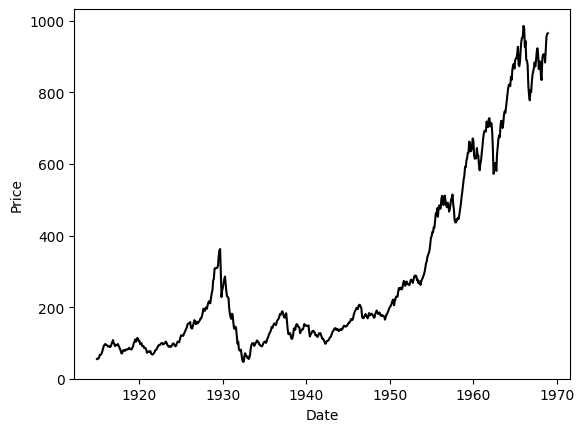

In [ ]:
sns.lineplot(x="Date", y="Price", data=df, color="black")

#### **Side-by-side Box Plots**

<Axes: xlabel='day_of_week', ylabel='Price'>

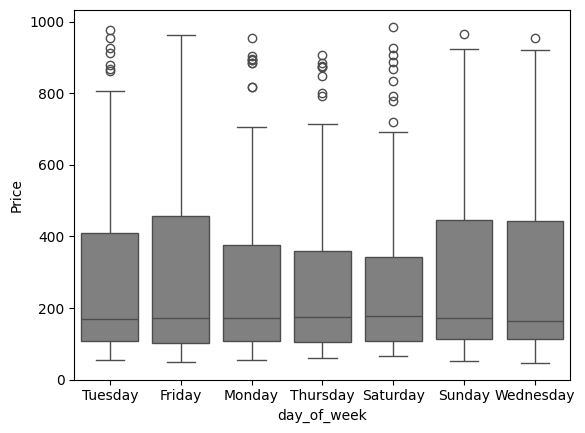

In [ ]:
sns.boxplot(x="day_of_week", y="Price", data=df, color="grey")

## **Multivariate Statistics**

Sometimes, a data analyst is interested in simultaneously exploring the relationship between three or more variables in a single visualization. Many of the visualization methods presented up to this point can include additional variables by using visual cues such as colors, shapes, and patterns. 

### **Grouped Box Plots**

Grouped box plots can be used to visualize two categorical variables and a quantitative variable. Having the box plots side-by-side can help you gain useful insights.

<Axes: xlabel='person_home_ownership', ylabel='person_age'>

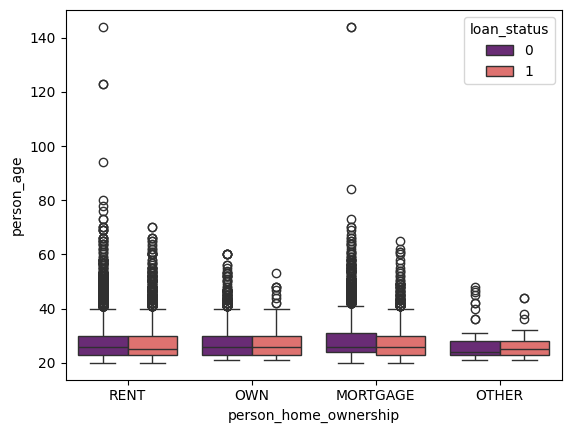

In [69]:
sns.boxplot(x="person_home_ownership", y="person_age", hue="loan_status", data=df, palette="magma")

<Axes: xlabel='person_home_ownership', ylabel='person_age'>

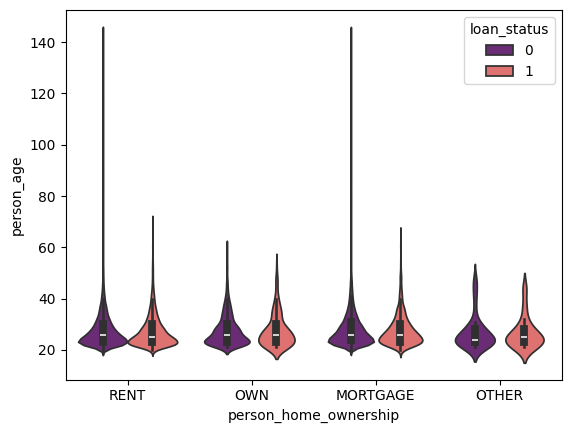

In [70]:
sns.violinplot(
    x="person_home_ownership", y="person_age", hue="loan_status", data=df, palette="magma"
)

### **Scatter Plot with Visual Cues**

One way to represent multivariate relationships is to use visual cues such as colors, shapes, and sizes in a scatter plot.

<Axes: xlabel='person_age', ylabel='person_income'>

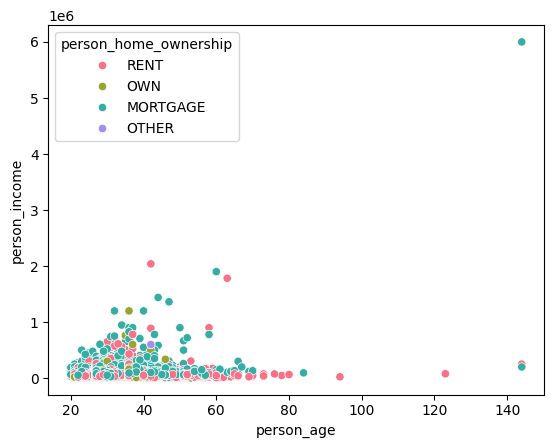

In [72]:
sns.scatterplot(
    x="person_age", y="person_income", hue="person_home_ownership", data=df, palette="husl"
)

### **Correlation Matrix**

A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have a high correlation, it means they are strongly related to each other.

In our dataset, the correlation matrix for the variables `Age`, `SibSp`, `Parch`, and `Fare` is as follows:

```plaintext
             Age     SibSp     Parch      Fare
Age    1.000000 -0.232743 -0.176744  0.093856
SibSp -0.232743  1.000000  0.414838  0.159651
Parch -0.176744  0.414838  1.000000  0.216225
Fare   0.093856  0.159651  0.216225  1.000000
```

- **Age** has a weak positive correlation with **Fare** (0.093856).
- **SibSp** and **Parch** have a moderate positive correlation (0.414838).
- **Fare** has a weak positive correlation with **Parch** (0.216225).



In [74]:
correlation_matrix = df[
    [
        "person_age",
        "person_income",
        "person_emp_length",
        "loan_amnt",
        "loan_int_rate",
        "loan_percent_income",
    ]
].corr()

correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.042411
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.254471
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.054111
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.572612
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.120314
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,1.000000


### **Heatmap**

A **heatmap** is a graphical representation of data where individual values are represented as colors. It is particularly useful for visualizing the correlation matrix, as it allows us to quickly identify patterns and relationships between variables.

<Axes: >

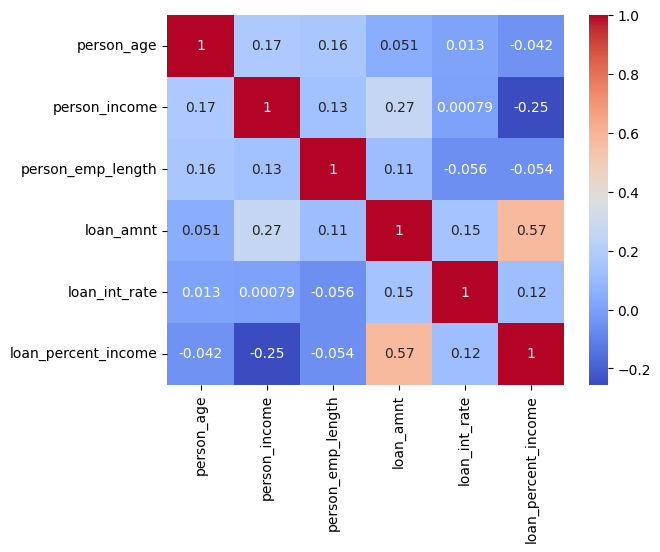

In [75]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

### **Multi-dimensional Plots**

Another way to represent multivariate relationships is to use multi-dimensional plots. For example, if we want to represent three variables in a dataset we can create a 3D scatter plot.

We will use the Python graphing library `Plotly` to load in a dataset and create an interactive 3D plot.

In [78]:
# create 3D scatter plot
fig = px.scatter_3d(df, z="person_age", y="person_income", x="loan_amnt", color="loan_int_rate")
fig.show()

3D plots allow you to see relationships that might not be visible in 2D, such as clusters. Interactive graphing libraries such as Plotly allow you to rotate the plot to see points from different angles and zoom into specific areas of interest.

The downside of 3D plots is that they can be difficult to read in two dimensions. That means that if you need to write a paper report, a 3D plot might not be the best idea.

# **Extra Reading**

https://medium.com/data-science/think-correlation-isnt-causation-meet-partial-correlation-c3895dfafcfa
